In [10]:
from pandas import *
from geopandas import *

In [11]:
mx_e=read_file('/home/augusto/Descargas/Proyecto basico de informacion 2020/Marco Geoestadistico/cartografia/estatal.shp')

In [12]:
mx_m=read_file('/home/augusto/Descargas/Proyecto basico de informacion 2020/Marco Geoestadistico/cartografia/municipal.shp')

In [13]:
enigh=read_csv('/home/augusto/wrb/humberto/inegi/DataInegi/conjunto_de_datos_enigh_ns_2020_csv/conjunto_de_datos_concentradohogar_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_concentradohogar_enigh_2020_ns.csv')

In [14]:
mx_m['CVEGEO'].astype('int')
d1=enigh.filter(['ubica_geo','tam_loc','sexo_jefe','edad_jefe'])
d2=mx_m.filter(['CVEGEO','geometry','NOM_ENT'])

In [15]:
d2['CVEGEO']=d2['CVEGEO'].astype('int')
d1=d1.rename(columns={'ubica_geo':'CVEGEO'})
d3=d1.merge(d2, on='CVEGEO')
d4=d3.groupby('CVEGEO').mean().round()
d5=d2.merge(d4, on='CVEGEO')

<AxesSubplot:>

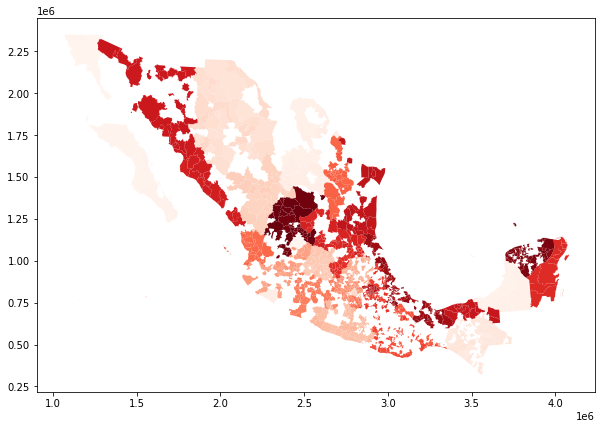

In [16]:
d5.plot(cmap='Reds',figsize=(10,20))

<AxesSubplot:>

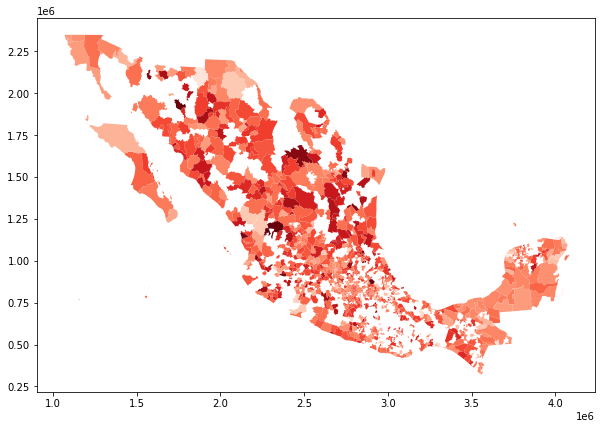

In [17]:
d5.plot(cmap='Reds',figsize=(10,20),column='edad_jefe')

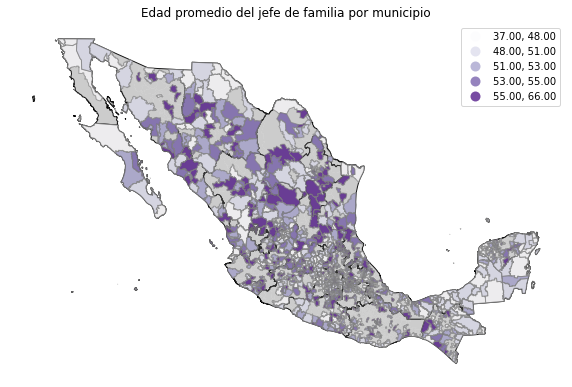

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,20))
mx_e.plot(ax=ax,color='w',edgecolor='k')
d2.plot(ax=ax,color='grey',alpha=0.4)
d5.plot(ax=ax,cmap='Purples',edgecolor='grey',categorical=True,column='edad_jefe',scheme="QUANTILES",legend=True,alpha=0.7)
plt.title('Edad promedio del jefe de familia por municipio')
ax.set_axis_off()

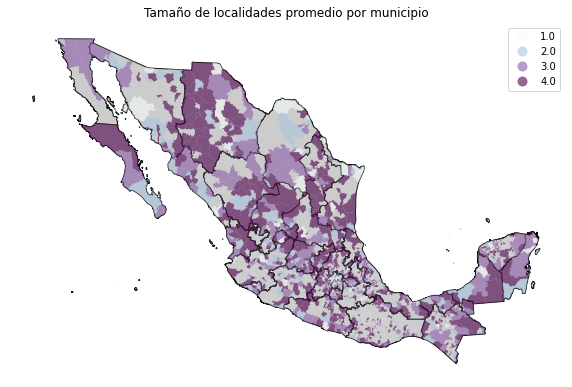

In [19]:
fig,ax=plt.subplots(figsize=(10,20))
mx_e.plot(ax=ax,color='w',edgecolor='k')
d2.plot(ax=ax,color='grey',alpha=0.4)
d5.plot(ax=ax,cmap='BuPu',categorical=True,column='tam_loc',legend=True,alpha=0.6)
plt.title('Tamaño de localidades promedio por municipio')
ax.set_axis_off()

# Mapas con Folium

In [20]:
import folium
import geodatasets

In [21]:
df1=read_csv('/home/augusto/Descargas/data kaggle/volcano_data_2010.csv')

In [23]:
df1.keys()

Index(['Year', 'Month', 'Day', 'TSU', 'EQ', 'Name', 'Location', 'Country',
       'Latitude', 'Longitude', 'Elevation', 'Type', 'Status', 'Time', 'VEI',
       'Agent', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION'],
      dtype='object')

In [24]:
df1.Type

0       Stratovolcano
1       Stratovolcano
2     Complex volcano
3       Stratovolcano
4       Stratovolcano
           ...       
58     Shield volcano
59      Stratovolcano
60      Stratovolcano
61     Shield volcano
62     Shield volcano
Name: Type, Length: 63, dtype: object

In [25]:
df=df1.filter(['Year','Name','Country','Latitude','Longitude','Type'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [29]:
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)

In [30]:
Gdf=GeoDataFrame(df,geometry=geometry)

In [31]:
Gdf

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)
...,...,...,...,...,...,...,...
58,2018,Kilauea,United States,19.425,-155.292,Shield volcano,POINT (-155.29200 19.42500)
59,2018,Kadovar,Papua New Guinea,-3.620,144.620,Stratovolcano,POINT (144.62000 -3.62000)
60,2018,Ijen,Indonesia,-8.058,114.242,Stratovolcano,POINT (114.24200 -8.05800)
61,2018,Kilauea,United States,19.425,-155.292,Shield volcano,POINT (-155.29200 19.42500)


In [32]:
mundo=read_file(geodatasets.get_path('naturalearth.land'))

In [33]:
df.Type

0       Stratovolcano
1       Stratovolcano
2     Complex volcano
3       Stratovolcano
4       Stratovolcano
           ...       
58     Shield volcano
59      Stratovolcano
60      Stratovolcano
61     Shield volcano
62     Shield volcano
Name: Type, Length: 63, dtype: object

In [34]:
mundo

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Land,0,0.0,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Land,0,0.0,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


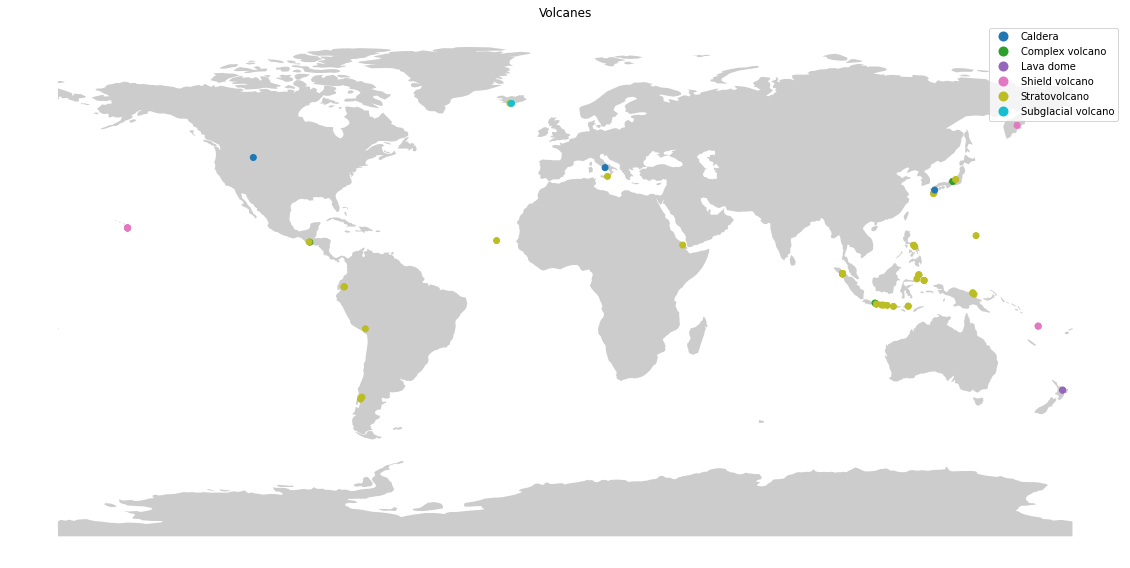

In [41]:
fig,ax=plt.subplots(figsize=(20,25))
mundo.plot(ax=ax,alpha=0.4,color='grey')
Gdf.plot(column='Type',ax=ax,legend=True)
plt.title('Volcanes')
ax.set_axis_off()

In [42]:
map=folium.Map(location=[19.02222, -98.62778],tiles='Stamen Terrain', zoom_start=9)

In [43]:
map

In [44]:
map=folium.Map(location=[19.02222, -98.62778],tiles='OpenStreetMap', zoom_start=9)

In [45]:
map

In [46]:
map=folium.Map(location=[19.02222, -98.62778],tiles='Stamen Toner', zoom_start=9)

In [47]:
map


In [48]:
map=folium.Map(location=[19.02222, -98.62778],tiles='Stamen Terrain', zoom_start=3)

In [49]:
Gdf_list = [[point.xy[1][0], point.xy[0][0]] for point in Gdf.geometry]


In [50]:
Gdf_list

[[-1.467, -78.442],
 [63.63, -19.62],
 [14.381, -90.601],
 [16.708, 145.78],
 [2.78, 125.48],
 [3.17, 98.392],
 [-7.542, 110.442],
 [-1.467, -78.442],
 [-7.942, 112.95],
 [-7.542, 110.442],
 [31.93, 130.87],
 [12.77, 124.05],
 [2.78, 125.48],
 [-1.467, -78.442],
 [-40.59, -72.117],
 [13.37, 41.7],
 [63.63, -19.05],
 [1.358, 124.792],
 [0.8, 127.325],
 [19.425, -155.292],
 [19.425, -155.292],
 [55.83, 160.33],
 [-7.542, 110.442],
 [-8.32, 121.708],
 [13.257, 123.685],
 [-8.32, 121.708],
 [-16.355, -70.903],
 [31.58, 130.67],
 [3.17, 98.392],
 [-38.12, 176.5],
 [3.17, 98.392],
 [-7.93, 112.308],
 [35.9, 137.48],
 [19.425, -155.292],
 [14.95, -24.35],
 [0.8, 127.325],
 [3.17, 98.392],
 [-41.326, -72.614],
 [2.78, 125.48],
 [-4.1, 145.061],
 [3.17, 98.392],
 [-38.12, 176.5],
 [3.17, 98.392],
 [3.17, 98.392],
 [44.43, -110.67],
 [-8.42, 116.47],
 [32.88, 131.1],
 [37.734, 15.004],
 [3.17, 98.392],
 [14.473, -90.88],
 [-7.2, 109.92],
 [40.827, 14.139],
 [-15.4, 167.83],
 [-7.542, 110.442],
 

In [52]:
i=0
for coordinates in Gdf_list:
    
    if Gdf.Type[i] == "Stratovolcano":
        type_color = "green"
    elif Gdf.Type[i] == "Complex volcano":
        type_color = "blue"
    elif Gdf.Type[i] == "Shield volcano":
        type_color = "orange"
    elif Gdf.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup="Year: "
            + str(Gdf.Year[i])
            + "<br>"
            + "Name: "
            + str(Gdf.Name[i])
            + "<br>"
            + "Country: "
            + str(Gdf.Country[i])
            + "<br>"
            + "Type: "
            + str(Gdf.Type[i])
            + "<br>"
            + "Coordinates: "
            + str(Gdf_list[i]),
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

In [53]:
map

In [54]:
from folium import plugins

In [55]:
map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)



In [56]:
map

In [58]:
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in Gdf.geometry]



In [59]:
heat_data


[[-1.467, -78.442],
 [63.63, -19.62],
 [14.381, -90.601],
 [16.708, 145.78],
 [2.78, 125.48],
 [3.17, 98.392],
 [-7.542, 110.442],
 [-1.467, -78.442],
 [-7.942, 112.95],
 [-7.542, 110.442],
 [31.93, 130.87],
 [12.77, 124.05],
 [2.78, 125.48],
 [-1.467, -78.442],
 [-40.59, -72.117],
 [13.37, 41.7],
 [63.63, -19.05],
 [1.358, 124.792],
 [0.8, 127.325],
 [19.425, -155.292],
 [19.425, -155.292],
 [55.83, 160.33],
 [-7.542, 110.442],
 [-8.32, 121.708],
 [13.257, 123.685],
 [-8.32, 121.708],
 [-16.355, -70.903],
 [31.58, 130.67],
 [3.17, 98.392],
 [-38.12, 176.5],
 [3.17, 98.392],
 [-7.93, 112.308],
 [35.9, 137.48],
 [19.425, -155.292],
 [14.95, -24.35],
 [0.8, 127.325],
 [3.17, 98.392],
 [-41.326, -72.614],
 [2.78, 125.48],
 [-4.1, 145.061],
 [3.17, 98.392],
 [-38.12, 176.5],
 [3.17, 98.392],
 [3.17, 98.392],
 [44.43, -110.67],
 [-8.42, 116.47],
 [32.88, 131.1],
 [37.734, 15.004],
 [3.17, 98.392],
 [14.473, -90.88],
 [-7.2, 109.92],
 [40.827, 14.139],
 [-15.4, 167.83],
 [-7.542, 110.442],
 

In [60]:
plugins.HeatMap(heat_data).add_to(map)

In [61]:
map